In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv("realistic_reviews.csv")

In [ ]:
df.head()

,review,sentiment
0,"Reliable, efficient, and looks good too!",1
1,Completely useless and overpriced.,0
2,Exceeded my expectations in every way.,1
3,Quality is poor. Waste of money.,0
4,Amazing performance and excellent support.,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     300 non-null    object
 1   sentiment  300 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


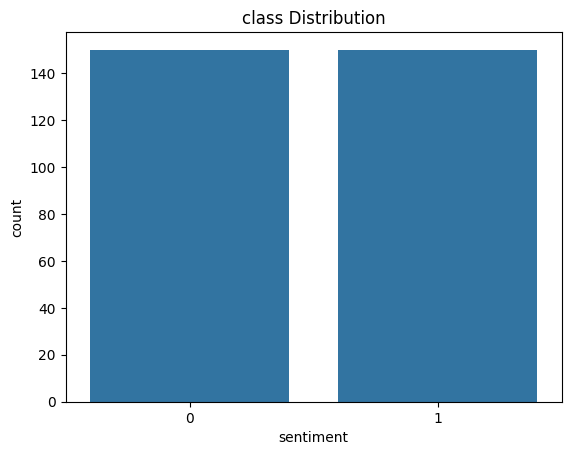

In [ ]:
# class balance
sns.countplot(x='sentiment',data=df)
plt.title('class Distribution')
plt.show()

In [ ]:
# wordcloud
pos_text=''.join(df[df['sentiment']==1]['review'])
pos_text

'Reliable, efficient, and looks good too!Exceeded my expectations in every way.Amazing performance and excellent support.Absolutely love it. Will buy again.This product is fantastic! Highly recommend it.Happy with the purchase. Would suggest to friends.This product is fantastic! Highly recommend it.Absolutely love it. Will buy again.Great quality and fast delivery.Happy with the purchase. Would suggest to friends.Amazing performance and excellent support.Very useful and well made. Five stars!Amazing performance and excellent support.Amazing performance and excellent support.Exceeded my expectations in every way.Exceeded my expectations in every way.Very useful and well made. Five stars!This product is fantastic! Highly recommend it.This product is fantastic! Highly recommend it.Amazing performance and excellent support.Reliable, efficient, and looks good too!Perfect fit and great value.Reliable, efficient, and looks good too!Very useful and well made. Five stars!Great quality and fast 

In [ ]:
neg_text=''.join(df[df['sentiment']==0]['review'])
neg_text

"Completely useless and overpriced.Quality is poor. Waste of money.Not what I expected. Would not buy again.Quality is poor. Waste of money.Too expensive for what it offers.Shipping was delayed and product was damaged.Customer support was not helpful at all.Shipping was delayed and product was damaged.Quality is poor. Waste of money.Customer support was not helpful at all.Terrible experience. Not recommended.Too expensive for what it offers.Not what I expected. Would not buy again.Defective item received. Sent it back.Customer support was not helpful at all.Quality is poor. Waste of money.Quality is poor. Waste of money.Too expensive for what it offers.Completely useless and overpriced.Not what I expected. Would not buy again.Doesn't work as advertised.Defective item received. Sent it back.Defective item received. Sent it back.Quality is poor. Waste of money.Customer support was not helpful at all.Quality is poor. Waste of money.Terrible experience. Not recommended.Doesn't work as adve

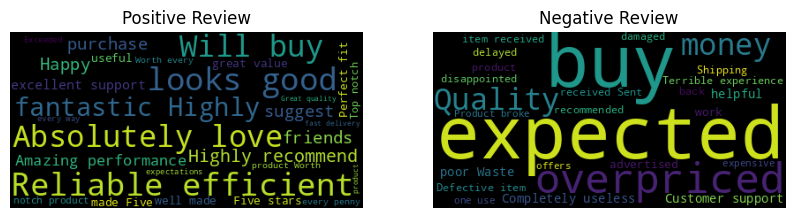

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(WordCloud().generate(pos_text))
plt.axis('off')
plt.title('Positive Review')
plt.subplot(1,2,2)
plt.imshow(WordCloud().generate(neg_text))
plt.axis('off')
plt.title('Negative Review')
plt.show()

In [ ]:
# text preprocessing and tokenization

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# RNN : Recurrent Neural Networks
# LSTM : Long Short term memory

vocab_size=1000  # Top most frequent used words
tokenizer=Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

sequences=tokenizer.texts_to_sequences(df['review'])
padded=pad_sequences(sequences,maxlen=100,truncating='post',padding='post')

x=padded
y=df['sentiment'].values

In [ ]:
# Building the model

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,16,input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

    ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Train
history=model.fit(x,y,epochs=10,validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.5669 - loss: 0.6921 - val_accuracy: 1.0000 - val_loss: 0.6856
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9814 - loss: 0.6814 - val_accuracy: 1.0000 - val_loss: 0.6661
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.6581 - val_accuracy: 1.0000 - val_loss: 0.6274
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 1.0000 - loss: 0.6102 - val_accuracy: 1.0000 - val_loss: 0.5511
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.5214 - val_accuracy: 1.0000 - val_loss: 0.4083
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.3618 - val_accuracy: 0.8167 - val_loss: 0.3244
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8793 - loss: 0.3353 - val_accuracy: 1.0000 - val_loss: 0.1615
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.1400 - val_accuracy: 1.0000 - val_loss: 0.0957
Epoch 9/10

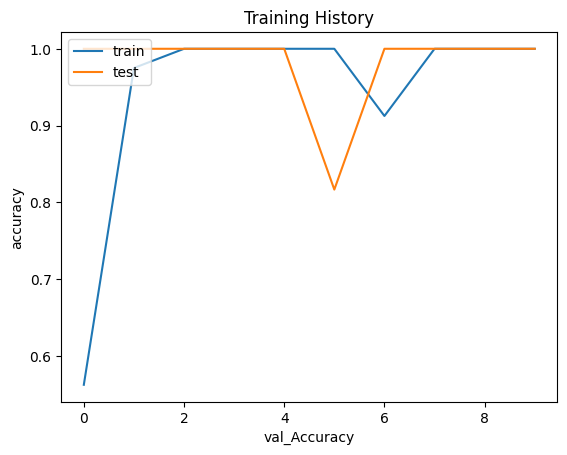

In [ ]:
# Accuracy score
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training History')
plt.ylabel('accuracy')
plt.xlabel('val_Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
def predict_sentiment(text):
  sequence=tokenizer.texts_to_sequences([text])
  padded=pad_sequences(sequence,maxlen=100,truncating='post',padding='post')
  pred=model.predict(padded)[0][0]
  if pred>0.5:
    print('Positive Review')
  else:
    print('Negative Review')

In [ ]:
predict_sentiment('I hate this product')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Negative Review


In [ ]:
predict_sentiment('I love this product')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Positive Review


In [ ]:
predict_sentiment('coffee is bad')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Negative Review
